In [13]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files

sns.set(style='whitegrid')

In [14]:
# Subir archivo
uploaded = files.upload()

# Cargar CSV en DataFrame
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [15]:
print('Filas, Columnas:', df.shape)
print('\nTipos de variables:\n', df.dtypes)
print('\nValores nulos:\n', df.isnull().sum())

Filas, Columnas: (374, 13)

Tipos de variables:
 Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Valores nulos:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [16]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

,0
Person ID,int64
Gender,category
Age,int64
Occupation,category
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,category
Blood Pressure,object


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


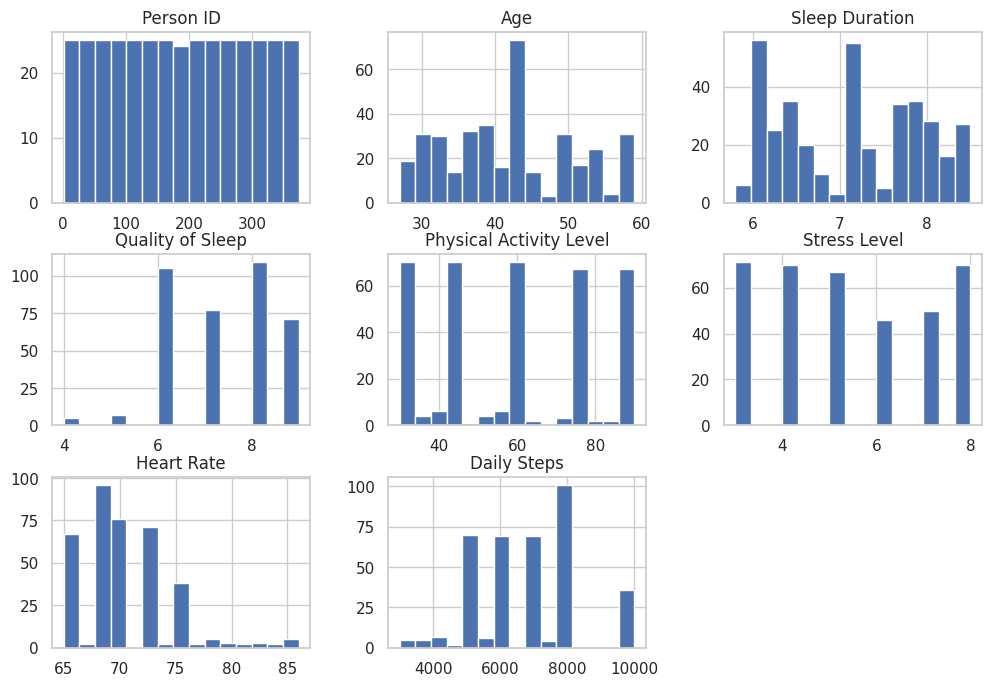

In [17]:
# Estadísticas descriptivas
display(df.describe(include='all'))

# Histogramas de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(figsize=(12,8), bins=15);

In [18]:
def remove_outliers_iqr(df, col_list):
    for col in col_list:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols_for_outliers = ['Heart Rate', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps']
df = remove_outliers_iqr(df, numeric_cols_for_outliers)
df.shape

(359, 13)

In [19]:
# Eliminar filas con Stress Level < 3
df = df[df['Stress Level'] >= 3]

# Crear variable binaria
df['stress_binary'] = df['Stress Level'].apply(lambda x: 1 if x >= 7 else 0)

# Eliminar columna original
df = df.drop(columns=['Stress Level'])

# Distribución final
df['stress_binary'].value_counts()

,count
stress_binary,
0,248
1,111


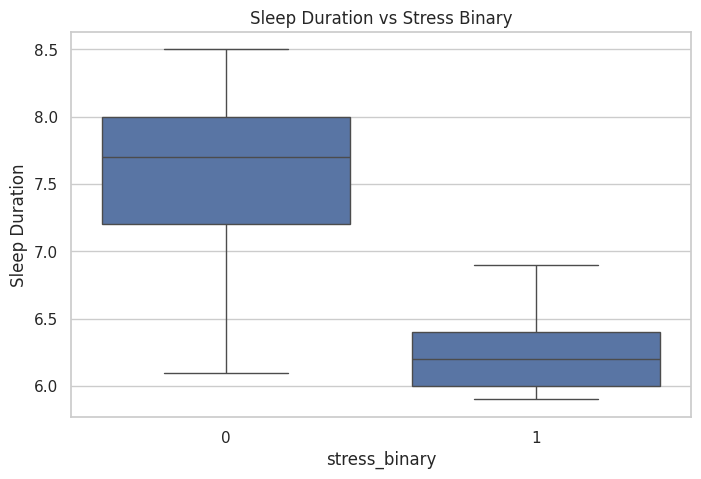

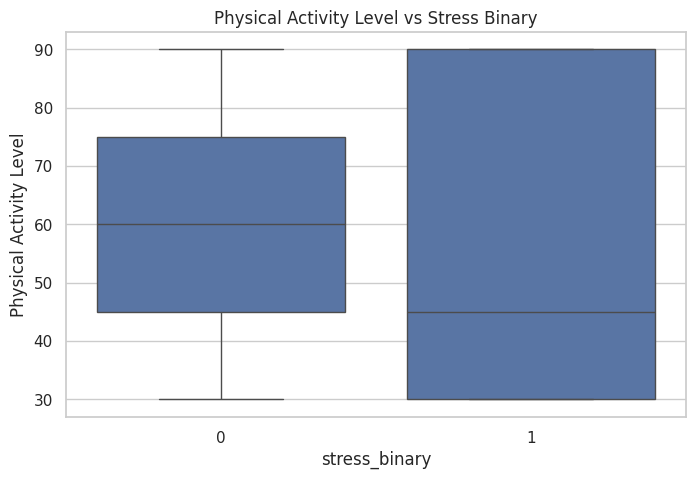

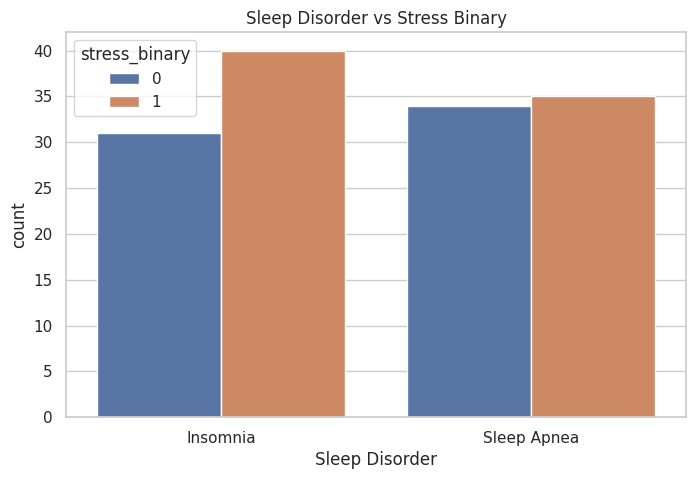

In [20]:
# Sleep Duration vs Estrés
plt.figure(figsize=(8,5))
sns.boxplot(x='stress_binary', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs Stress Binary')
plt.show()

# Physical Activity Level vs Estrés
plt.figure(figsize=(8,5))
sns.boxplot(x='stress_binary', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level vs Stress Binary')
plt.show()

# Sleep Disorder vs Estrés
plt.figure(figsize=(8,5))
sns.countplot(x='Sleep Disorder', hue='stress_binary', data=df)
plt.title('Sleep Disorder vs Stress Binary')
plt.show()

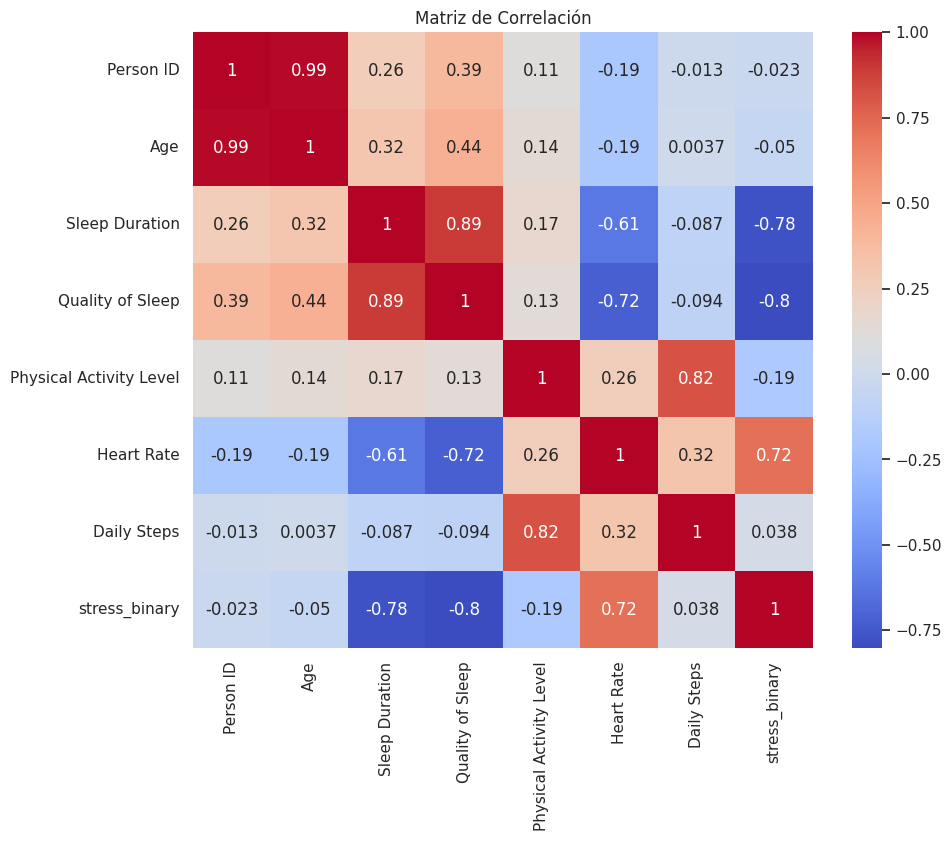

In [21]:
# Exclude non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [22]:
train, test = train_test_split(df, test_size=0.2, stratify=df['stress_binary'], random_state=42)

# Guardar CSV
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

print('Train:', train.shape, 'Test:', test.shape)

Train: (287, 13) Test: (72, 13)


In [23]:
# Columnas finales
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'stress_binary'],
      dtype='object')